# PROJECT_MOD2_LINEAR REGRESSION

### 1. DATA PREPROCESSING

### 1.1 Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pyearth import Earth

from pygam import LinearGAM
from pygam import GAM
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor

### 1.2. Read in Data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head().append(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df.columns.to_list())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### 1.3. Data Cleaning

### a) Column 'date'

In [8]:
### convert 'date of sale' column to 'datetime' type
df['date'] = pd.to_datetime(df.date) 

# split column with years values only
df['year_sale'] = df['date'].dt.year # year sale
df['month_sale'] = df['date'].dt.month # month sale

In [9]:
# df[['date','year_sale','month_sale']].head()

In [10]:
# drop 'date' column
df.drop(columns = ['date'], inplace= True)

### b) Column 'sqft_basement'

In [11]:
### 'sqft_basement' column is object type, check content
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2196.0        1
4130.0        1
3480.0        1
1248.0        1
1281.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
# convert to integer type, '?' will be converted to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [13]:
# get median, mean for sqft_basement
df['sqft_basement'].agg(['median', 'mean'])

median      0.000000
mean      291.851724
Name: sqft_basement, dtype: float64

In [14]:
# replace Nan values with median=0
df['sqft_basement'].fillna(value = df['sqft_basement'].median(),inplace=True)

### c) Column 'id'. Check for duplicates

In [15]:
df.duplicated().sum()

0

In [16]:
### Check for duplicates by 'id' columns
df.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [17]:
# check first id, house sold 3 times
df.loc[df.id == 795000620]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
17588,795000620,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,9
17589,795000620,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,12
17590,795000620,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,...,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250,2015,3


In [18]:
# it was decided not to remove, as each deal corresponds to different date of sale

### d) Column 'bedrooms'.

In [19]:
# check bedrooms columns
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [20]:
# look closer for bedrroms >= 10
df.loc[df['bedrooms'] >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,2014,8
13301,627300145,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,2014,8
15147,5566100170,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,...,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,2014,10
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,6
19239,8812401450,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,2014,12


In [21]:
# drop row with 33 bedrooms. not matching per tot. sq.ft
df.drop(index=15856,inplace = True)

### e) Column 'waterfront'.

In [22]:
# check 'waterfront' column
df['waterfront'].value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

In [23]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [24]:
# replace NAN with median=0
df['waterfront'].fillna(value = df['waterfront'].median(),inplace=True)

In [25]:
# verify 'waterfront' by value_counts()
df['waterfront'].value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

### f) Column 'view'.

In [26]:
# check values in 'view' column
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [27]:
#replace Nan values with median = 0
df['view'].fillna(value = df['view'].median(),inplace=True)

In [28]:
# verify 'view' by value_counts()
df['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### g) Column 'yr_renovated'. 

In [29]:
# check 'yr_renovated' column
df['yr_renovated'].value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [30]:
#replace Nan values with median = 0
df['yr_renovated'].fillna(value = df['yr_renovated'].median(),inplace=True)

In [31]:
# verify 'yr_renovated' by value_counts()
df['yr_renovated'].value_counts()

0.0       20852
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
### better to drop 'yr_renovated' as majority is missing.
# also drop'id' column
df.drop(columns=['id','yr_renovated'],inplace = True)

In [33]:
# final check for nan values
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
year_sale        21596 non-null int64
month_sale       21596 non-null int64
dtypes: float64(8), int64(12)
memory usage: 3.5 MB


### h) Target Column 'price'. 

In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,2014.322976,6.573995
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,53.514040,0.138552,0.140725,685.231768,27275.018316,0.467625,3.115131
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


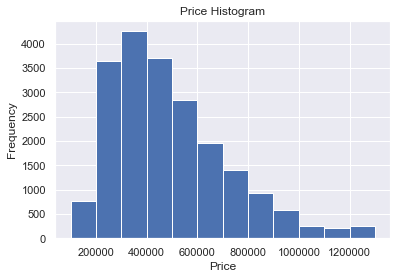

In [35]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=df['price'],bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

In [37]:
# Check amount of data with price below $1.3 mln
len(df.loc[df['price']<=1.3*10**6])/len(df)

0.9641600296351176

In [38]:
# Based on the majority of the data are below 1.3mln, 
# it was decided to do analysis on this data only
# Create adjusted DF with price range below 1.3mln.
df_adj = df.loc[df['price']<=1.3*10**6]
len(df_adj)

20822

### i) Check multicollinearity 


In [40]:
# create features X and target y.
columns = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[columns], df_adj['price']

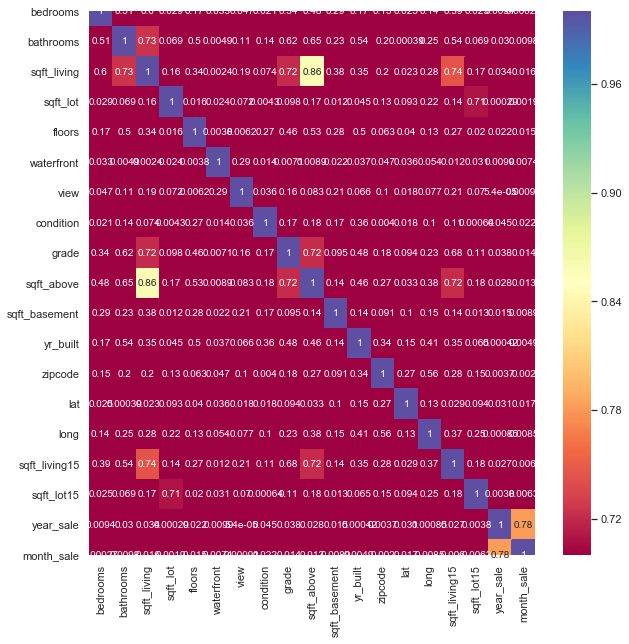

In [44]:
# check multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(X.corr().abs(), cmap = "Spectral", vmin=0.7,annot = True)

In [42]:
### Observations:
### there are collinearity between 
### 1) [sqft_living] and ['sqft_above','grade','bathrooms','sqft_lot15', 'sqft_living15']
### 2) [sqft_lot] colliniear with [sqft_lot_15]
### 3) [yr_sale] with [month_sale]
### 4) also from the data it was clear that sq_ft_living = sft_basement + sqft_above 

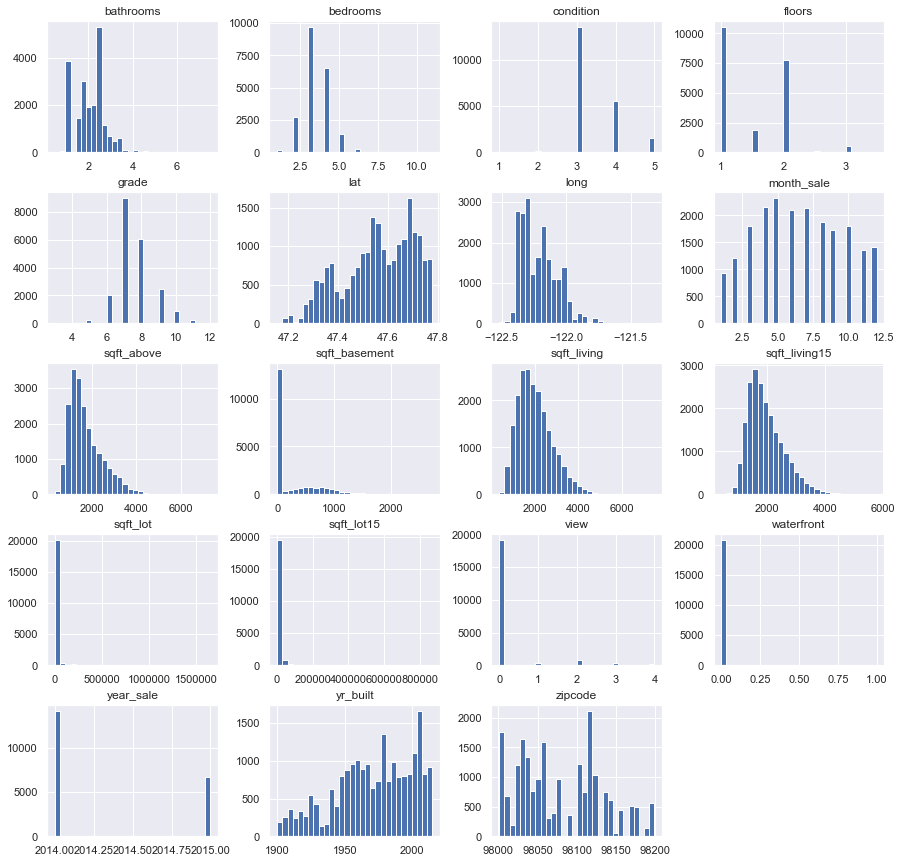

In [47]:
# Plot all features
X.hist(figsize  = [15, 15],bins=30) 
plt.show()

In [50]:
print(columns)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [55]:
# lets create two features' lists for analysis
# 1) with full features
# 2) with reduced features and compare in 
# and test in the base model which one is more accurate

columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'view', 'condition', 'grade', 'sqft_above', 
           'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 
           'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']

columns_red = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
               'floors','view', 'condition', 'grade', 
               'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
               'month_sale']

### 2. BASELINE MODEL - Linear Regression

### 2a) Functions 

In [105]:
def mean_absolute_percentage_error(y, y_pred): 
    
    '''
    Arguments: 
    y - true value; 
    y_pred - predicted values.
    
    Function returns mean_absolute_percentage_error.
    '''
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

def metrics(y, y_pred):
        
    '''
    Arguments: 
    y - true value; 
    y_pred - predicted values.
    
    Function prints metrics: r2, mean absolute error, 
    and mean absolute percentage error.
    '''
    print('Metrics:')
    print("R2:", r2_score(y, y_pred))
    print("Mean absolute error:", mean_absolute_error(y, y_pred))
    print("Mean absolute percentage error:",mean_absolute_percentage_error(y, y_pred))

    
def model_evaluate(old_pipe, bagging=True):
    '''
    Arguments: 
    pipe and bagging=True.
    
    Function returns list of pipelines
    '''
    if bagging:
        pipe = BaggingRegressor(old_pipe, n_estimators=3)
    else:
        pipe = old_pipe
        
    metrics = ['r2', 
               'neg_mean_absolute_error']
    
    # cross validate returns a dictionary object
    preds = cross_validate(pipe, X, y, 
                           cv=4, n_jobs=-1, 
                           scoring=metrics,
                           return_estimator=True)

    print("-"*60)
    for i, tag in enumerate(preds):
        if 'time' not in tag and 'estimator' not in tag:
            print(tag, ":", 
                  "%.4f" % preds[tag].mean(), 
                  "+/-", 
                  "%.4f" % preds[tag].std())
            if i % 2 == 0:
                print()
                print("-"*60)
                
    if bagging:
        coeffs = []
        for i in range(3):
            for j in range(3):
                estimator = preds['estimator'][i].estimators_[j]
                modeling_step = estimator.steps[1][0]
                coef = estimator.named_steps[modeling_step].coef_
                coeffs.append(coef)

        coeffs = [(
            "Beta_%s" % (i+1), 
            "%.4f" % np.mean(coeffs, axis=0)[i],
            "%.4f" % np.std(coeffs, axis=0)[i],
        ) for i in range(len(used_cols))]
        for coeff in coeffs:
            print(coeff[0], ":\t", coeff[1], "+/-", coeff[2])

        print()
        print("-"*60)
        
    return preds['estimator'] 




def model_predict(pipe):
    '''
    Arguments: 
    pipe.
    
    Function returns list of prediction.
    '''
    
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred


def plot_residuals():
    
    '''
    Function prints plots:
     - plot y_true vs y_pred
     - plot residual histogram
    '''
    
    # plot y_true vs y_pred
    plt.figure(figsize=(8,8))
    plt.scatter(y,y_pred, color = 'green')
    plt.plot([0, y.max()],[0,y.max()], label = 'y = y_pred')
    plt.legend()
    plt.xlabel('y: Price')
    plt.ylabel('y_pred: Predcited Price')
    plt.title('Price vs Predicted Price')
    plt.show()
    
    # plot residual histogram
    color = 'mediumpurple'
    plt.figure(figsize=(12,7))
    plt.hist(y - y_pred, histtype = 'bar', range = (-500000, 500000),bins = 50, color=color)
    plt.ylim(0,3500)
    plt.xlim(-350000, 350000)
    plt.xticks((range(-350000,350000, 25000)), rotation = 'vertical')
    plt.xlabel('y_true - y_pred')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')
    plt.show()

### 2b) Baseline : Linear (OLS) Regression with all features

In [61]:
# create X, y for all features
used_cols = columns
X, y = df_adj[used_cols], df_adj['price']

In [62]:
# Run Linear Regression
scaler = RobustScaler()
lr = LinearRegression()
pipe_base_1 = make_pipeline(scaler, lr)
pipe_base_1 = model_evaluate(pipe_base_1) 
y_pred = model_predict(pipe_base_1)

------------------------------------------------------------
test_r2: 0.7034 +/-0.0061
test_neg_mean_absolute_error: -92351.2362 +/-924.7341

------------------------------------------------------------
Beta_1 :	 -11606.4075 +/- 1479.1165
Beta_2 :	 24929.5800 +/- 2242.8921
Beta_3 :	 68014.0667 +/- 13544.8160
Beta_4 :	 1025.0673 +/- 268.7752
Beta_5 :	 35878.1687 +/- 3916.1190
Beta_6 :	 40698.9294 +/- 1321.6901
Beta_7 :	 26693.4716 +/- 1444.6362
Beta_8 :	 77630.9861 +/- 2031.3802
Beta_9 :	 18952.9971 +/- 11404.6708
Beta_10 :	 9201.1379 +/- 6505.5653
Beta_11 :	 -91228.4832 +/- 2882.2664
Beta_12 :	 -20142.4818 +/- 2214.6315
Beta_13 :	 118248.0140 +/- 1513.6852
Beta_14 :	 -15574.5311 +/- 1775.1992
Beta_15 :	 40878.4588 +/- 3179.9858
Beta_16 :	 -680.1549 +/- 287.5449
Beta_17 :	 22968.7215 +/- 3815.4637
Beta_18 :	 2217.0756 +/- 3456.3196

------------------------------------------------------------


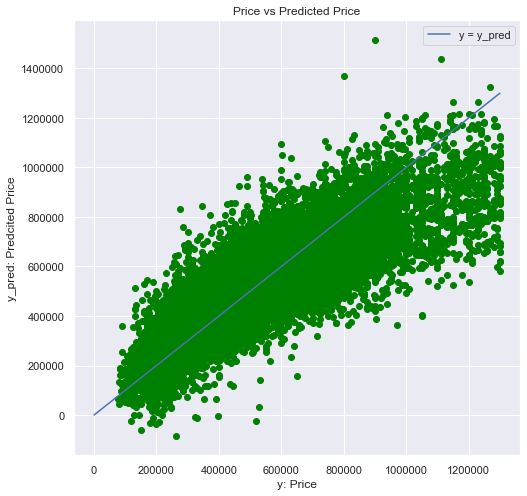

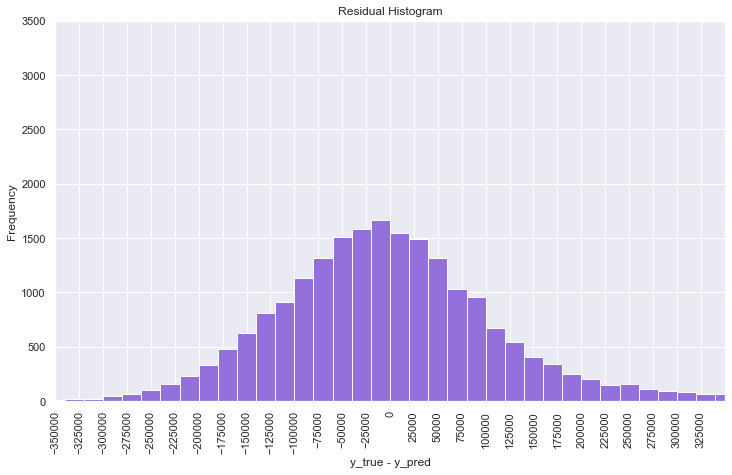

In [63]:
# Plot residuals
plot_residuals()

In [64]:
# Observations:
# 1) the base model has r2 =0.7. 
# 2) the mean absolute and RMSE are around $92k.

### 2c) Baseline : Linear (OLS) Regression with reduced features

In [65]:
# create X, y for reduced features
used_cols = columns_red
X, y = df_adj[used_cols], df_adj['price']

In [67]:
# Run Linear Regression
scaler = RobustScaler()
lr = LinearRegression()
pipe_base_2 = make_pipeline(scaler, lr)
pipe_base_2 = model_evaluate(pipe_base_2) 
y_pred = model_predict(pipe_base_2)

------------------------------------------------------------
test_r2: 0.7021 +/-0.0061
test_neg_mean_absolute_error: -92564.5046 +/-910.5204

------------------------------------------------------------
Beta_1 :	 -12864.3714 +/- 1134.9828
Beta_2 :	 23301.9927 +/- 3110.6992
Beta_3 :	 87185.1190 +/- 3551.8611
Beta_4 :	 872.5732 +/- 189.4216
Beta_5 :	 33976.3259 +/- 2323.3876
Beta_6 :	 38739.3871 +/- 1491.0934
Beta_7 :	 26522.9179 +/- 2254.3306
Beta_8 :	 78845.4056 +/- 945.5237
Beta_9 :	 -91040.1718 +/- 2098.1708
Beta_10 :	 -21966.7170 +/- 2010.4199
Beta_11 :	 119173.9041 +/- 2655.4910
Beta_12 :	 -15297.7190 +/- 2133.9219
Beta_13 :	 39603.2396 +/- 2841.3709
Beta_14 :	 -12307.7996 +/- 1082.0710

------------------------------------------------------------


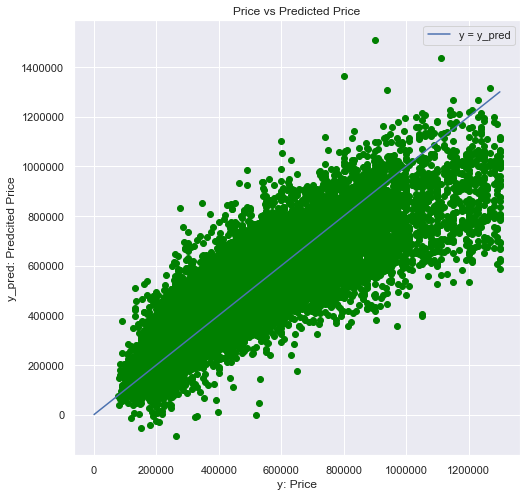

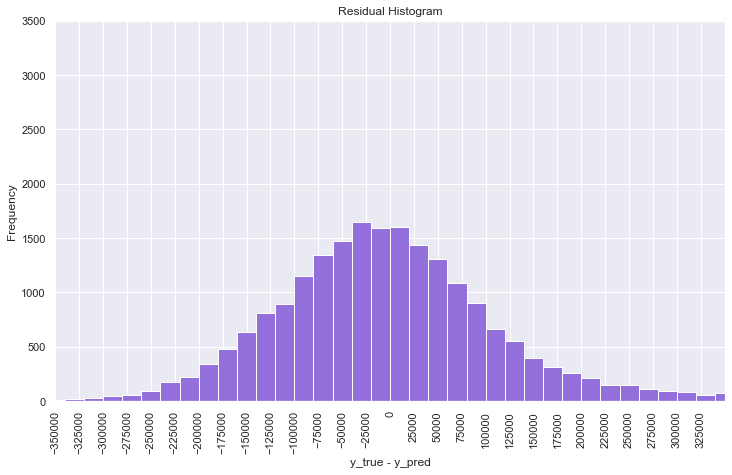

In [68]:
# Plot residuals
plot_residuals()

In [69]:
# Observations:
# 1)result quite similar to base model with all features, 
# 2)there is no significant difference

### Additive Models (Linear Models + New Bases)

### 3. MARS (Multivariate Adaptive Regression Splines)
### 3a. MARS with one DoF (with all features)

In [70]:
# create X, y for all features
used_cols = columns
X, y = df_adj[used_cols], df_adj['price']

In [73]:
criteria = ('rss', 'nb_subsets')
mars1 = Earth(max_degree=1,
             feature_importance_type=criteria)
pipe_mars1 = make_pipeline(scaler, mars1)
pipe_mars1 = model_evaluate(pipe_mars1,bagging=False)
y_pred = model_predict(pipe_mars1)

------------------------------------------------------------
test_r2 : 0.7180 +/- 0.0055
test_neg_mean_absolute_error : -89831.6343 +/- 933.0177

------------------------------------------------------------


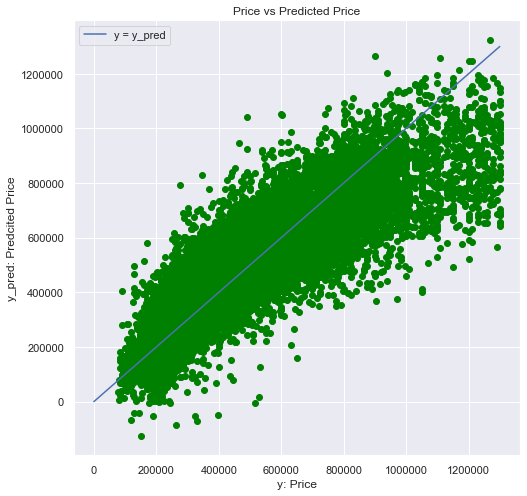

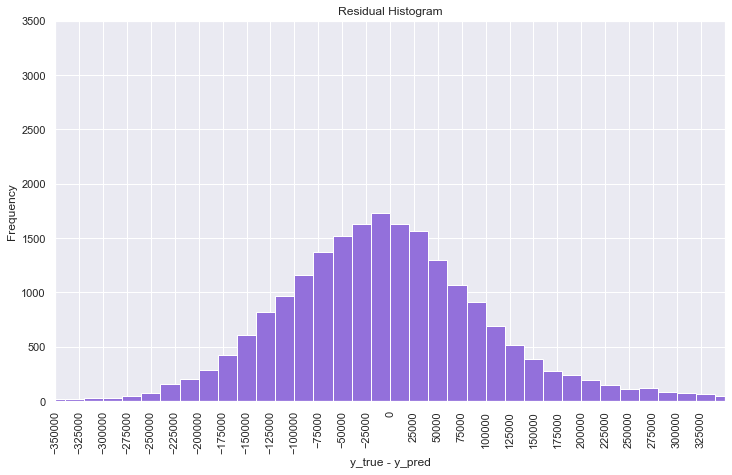

In [74]:
plot_residuals()

In [75]:
mars1.fit(X,y)
print(mars1.summary())
print(mars1.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
-------------------------------------------
Basis Function       Pruned  Coefficient   
-------------------------------------------
(Intercept)          No      -1.35556e+07  
grade                No      80078.9       
h(lat-47.2416)       No      539163        
h(47.2416-lat)       No      497411        
h(sqft_living-4980)  Yes     None          
h(4980-sqft_living)  No      -90.2995      
yr_built             No      -1993.42      
view                 No      40086         
h(sqft_lot-8821)     No      0.211653      
h(8821-sqft_lot)     No      3.66495       
sqft_living15        No      56.7748       
condition            No      27684         
zipcode              No      -259.502      
year_sale            No      21232.7       
h(sqft_lot15-9405)   Yes     None          
h(9405-sqft_lot15)   No      9.51426       
h(bathrooms-5.25)    No      -106411       
h(5.25-bathrooms)    No      -20977.6      
bedrooms             No      -8695.28      
--------------------

In [77]:
# Observations:
# 1)metric improved a bit compare to base model with all features

### 3b. MARS with one DoF (with reduced features)

In [78]:
# create X, y for reduced features
used_cols = columns_red
X, y = df_adj[used_cols], df_adj['price']

In [79]:
criteria = ('rss', 'nb_subsets')
mars1_r = Earth(max_degree=1,
             feature_importance_type=criteria)
pipe_mars1_r = make_pipeline(scaler, mars1_r)
pipe_mars1_r = model_evaluate(pipe_mars1_r, bagging=False)
y_pred = model_predict(pipe_mars1_r)

------------------------------------------------------------
test_r2 : 0.7133 +/- 0.0068
test_neg_mean_absolute_error : -90433.8872 +/- 820.2648

------------------------------------------------------------


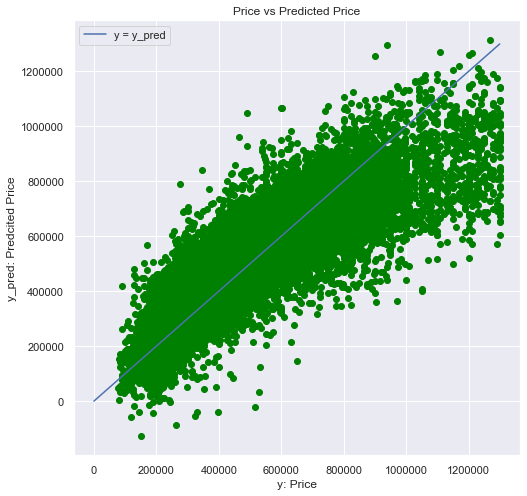

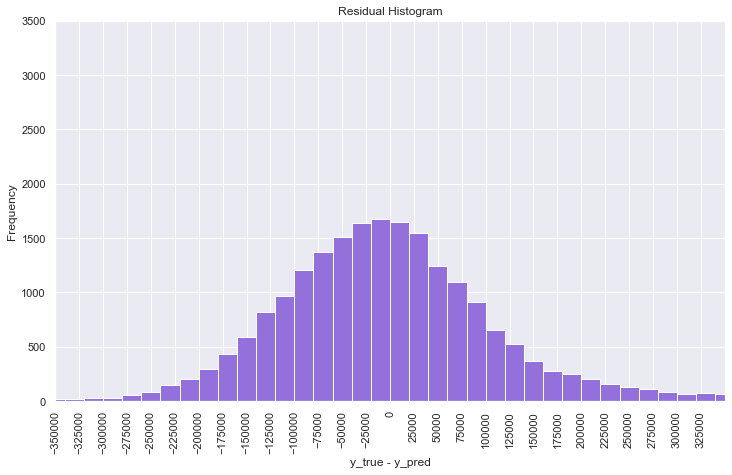

In [80]:
plot_residuals()

In [81]:
mars1_r.fit(X,y)
print(mars1_r.summary())
print(mars1_r.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
------------------------------------------
Basis Function       Pruned  Coefficient  
------------------------------------------
(Intercept)          No      2.71084e+07  
grade                No      82027.1      
h(lat-47.2458)       No      540316       
h(47.2458-lat)       Yes     None         
h(sqft_living-5000)  Yes     None         
h(5000-sqft_living)  No      -82.7291     
yr_built             No      -1887.84     
view                 No      41182        
h(sqft_lot-7760)     No      21.4151      
h(7760-sqft_lot)     Yes     None         
sqft_living15        No      52.6032      
condition            No      26490        
zipcode              No      -239.78      
h(bathrooms-5.25)    No      -112014      
h(5.25-bathrooms)    No      -19247.7     
h(sqft_lot-4339)     No      -21.2024     
h(4339-sqft_lot)     Yes     None         
month_sale           No      -2250.92     
------------------------------------------
MSE: 14990716093.1044, GCV: 15039069136.35

In [106]:
# Observations:
# 1)metric improved a bit compare to base model with reduced features

### 3c. MARS with two DoF (with all features)

In [83]:
# create X, y for all features
used_cols = columns
X, y = df_adj[used_cols], df_adj['price']

------------------------------------------------------------
test_r2 : 0.7908 +/- 0.0148
test_neg_mean_absolute_error : -75824.6915 +/- 3589.9505

------------------------------------------------------------


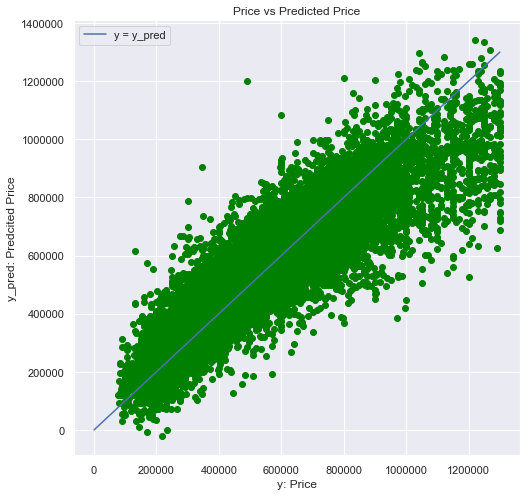

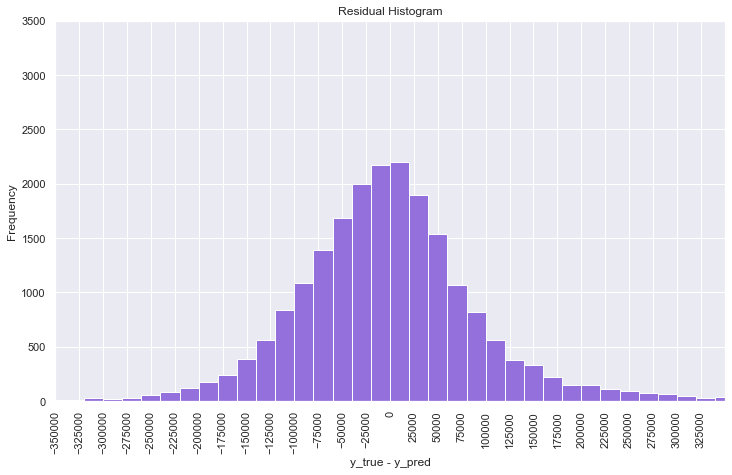

In [84]:
mars2 = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars2 = make_pipeline(scaler, mars2)
pipe_mars2 = model_evaluate(pipe_mars2, bagging=False)
y_pred = model_predict(pipe_mars2)
plot_residuals()

In [85]:
mars2.fit(X,y)
print(mars2.summary())
print(mars2.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
------------------------------------------------------------
Basis Function                         Pruned  Coefficient  
------------------------------------------------------------
(Intercept)                            No      2.36214e+07  
grade                                  Yes     None         
h(lat-47.2416)*grade                   No      125204       
h(47.2416-lat)*grade                   Yes     None         
h(sqft_living-4980)*grade              Yes     None         
h(4980-sqft_living)*grade              No      -20.3767     
yr_built*grade                         No      47.5314      
view                                   No      35054.2      
h(sqft_lot-8821)*grade                 No      0.0243629    
h(8821-sqft_lot)*grade                 Yes     None         
sqft_living15                          No      2128.32      
condition*sqft_living15                No      16.1124      
zipcode                                No      -705.708     
yr_built*sqf

In [86]:
# Observations:
# 1)metric improved a considerably compare to base model withh all features
# r2 = 0.7908 +/-0.0148
# mean_absolute_error = 75824.6915 +/-3589.9505

### 3d. MARS with two DoF (with reduced features)

In [87]:
# create X, y for reduced features
used_cols = columns_red
X, y = df_adj[used_cols], df_adj['price']

In [88]:
mars2r = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars2r = make_pipeline(scaler, mars2r)
pipe_mars2r = model_evaluate(pipe_mars2r, bagging=False)
y_pred = model_predict(pipe_mars2r)

------------------------------------------------------------
test_r2 : 0.7867 +/- 0.0130
test_neg_mean_absolute_error : -76503.7683 +/- 3133.4047

------------------------------------------------------------


In [89]:
mars2r.fit(X,y)
print(mars2r.summary())
print(mars2r.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
---------------------------------------------------------
Basis Function                     Pruned  Coefficient   
---------------------------------------------------------
(Intercept)                        No      2.9523e+07    
grade                              No      120792        
h(lat-47.2458)*grade               No      75057         
h(47.2458-lat)*grade               No      73297.1       
h(sqft_living-5000)*grade          Yes     None          
h(5000-sqft_living)*grade          No      -21.4788      
yr_built*grade                     Yes     None          
view                               No      -8.54586e+06  
h(sqft_lot-7760)*grade             No      -0.180972     
h(7760-sqft_lot)*grade             No      4.19019       
sqft_living15                      No      1786.79       
condition*sqft_living15            No      15.3146       
zipcode                            No      -301.725      
h(sqft_living-5000)*sqft_living15  Yes     None          
h(

In [90]:
# Observations:
# 1)metric improved a considerably compare to base model withh reduced features
# 2) however, model with all features performs better
# 3) all next models will be based on all features.

### 4a. GAM with all features

In [91]:
# create X, y for all features
used_cols = columns
X, y = df_adj[used_cols], df_adj['price']

In [92]:
# Run GAM Model
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:49 Time:  0:00:49


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    265.2747
Link Function:                     IdentityLink Log Likelihood:                               -496448.6464
Number of Samples:                        20822 AIC:                                           993429.8422
                                                AICc:                                           993436.767
                                                GCV:                                        9239359258.975
                                                Scale:                                     9027723406.9724
                                                Pseudo R-Squared:                                   0.8296
Feature Function                  Lam

In [93]:
y_pred = model_predict([gam])

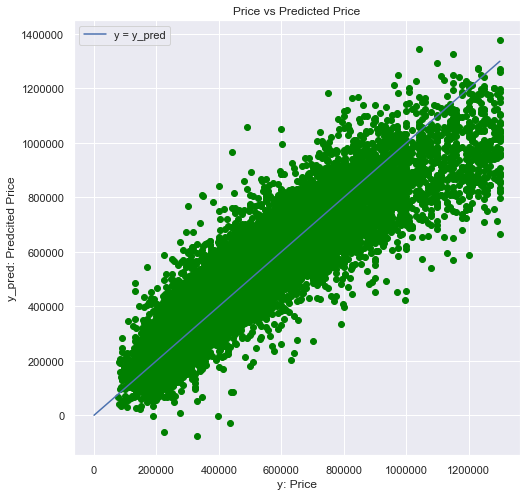

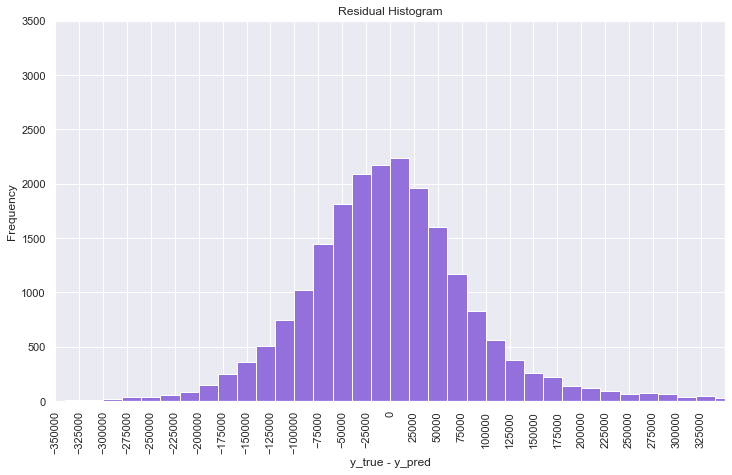

In [94]:
plot_residuals()

In [96]:
## print metrics
metrics(y,y_pred)

Metrics:
R2: 0.8295663109525029
Mean absolute error: 68226.98016374397
Mean absolute percentage error: 15.499230038155238


In [97]:
# Observations:
# 1)metrics improved a considerably compare to Base and MARS models 
# R2: 0.8296
# Mean absolute error: $68226.98
# Mean absolute percentage error: 15.5%

### 4b. GAM with tensor (with all features)

In [98]:
print(used_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [99]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# interaction terms
term_list.append(tensor(11, 12, 13)) # longitude and latitude and zipcode
term_list.append(tensor(2, 8, 9)) # 'sqft_living', 'sqft_above', 'sqft_basement'
term_list.append(tensor(-1, -2)) # month and year of sale
term_list.append(tensor(6, 7)) # Grade and condition

# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + te(11, 12, 13) + te(2, 8, 9) + te(-1, -2) + te(6, 7)


In [100]:
# Run GAM Model
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:50:49 Time:  0:50:49


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    427.4435
Link Function:                          LogLink Log Likelihood:                               -261352.6024
Number of Samples:                        20822 AIC:                                           523562.0919
                                                AICc:                                          523580.1369
                                                GCV:                                                0.0253
                                                Scale:                                              0.0243
                                                Pseudo R-Squared:                                   0.8862
Feature Function                  Lam

In [101]:
y_pred = model_predict([gam])

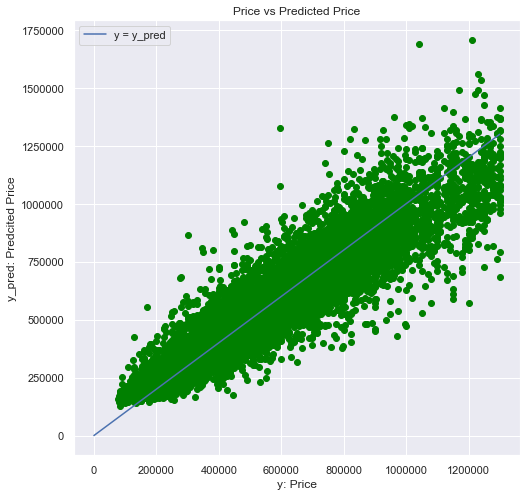

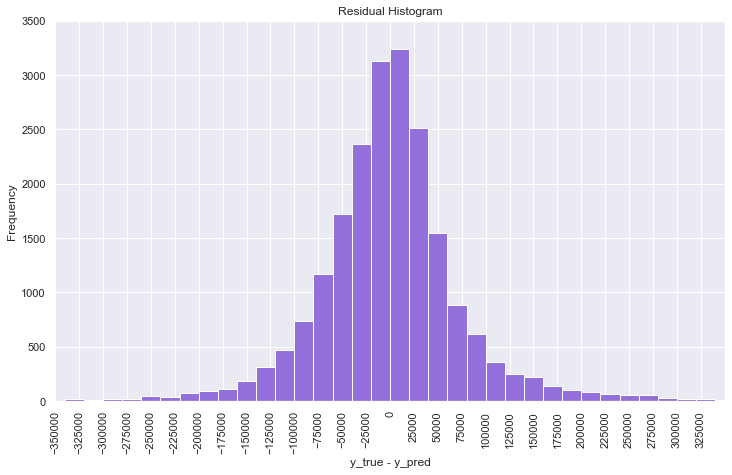

In [102]:
plot_residuals()

In [103]:
## print metrics
metrics(y,y_pred)

Metrics:
R2: 0.8808540421532955
Mean absolute error: 53387.682209000144
Mean absolute percentage error: 11.66999768781174


In [104]:
# Observations:
# 1)metrics improved a considerably compare to previous versions of the model
# R2: 0.8808
# Mean absolute error: $53387.68
# Mean absolute percentage error: 11.7%